Laboratorium 7. ROZPOZNAWANIE OBRAZÓW. SIECI KONWOLUCYJNE,
PORÓWNANIE Z GĘSTO POŁĄCZONYMI SIECIAMI NA PRZYKŁADZIE
ROZPOZNAWANIA PISANYCH RĘCZNIE CYFR (MNIST)

Siecią konwolucyjną nazywamy sieć
neuronową, której przynajmniej jedna warstwa wykorzystuje operację konwolucji (ang.
Convolution), w literaturze polskojęzycznej również może występować określenie „splot”.
Niezależnie od nazwy jest to operacja, opisywana za pomocą wzoru (7.1). W tym wzorze
stosowane są następujące oznaczenia:
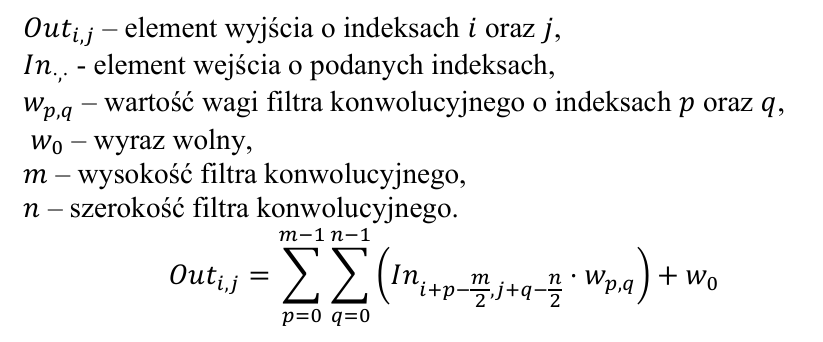


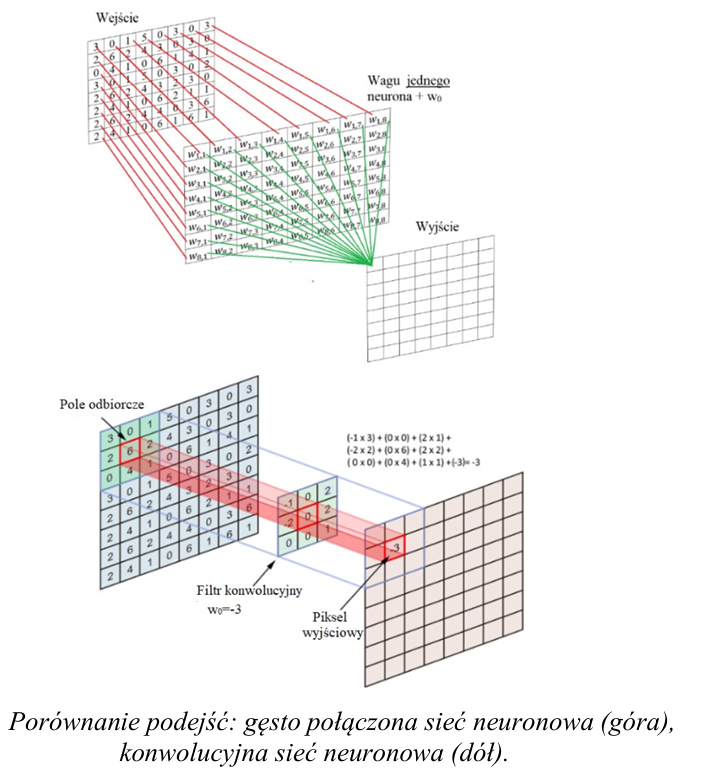

Importowanie bibliotek

  Conv2D, Flatten, Dense to warstwy sieci neuronowej. <br>
  **Conv2D** to warstwa konwolucyjna, <br>
  **Flatten** przekształca dane 2D na 1D, <br> **Dense** to warstwa w pełni połączona. <br>
  **MaxPooling** w sieciach neuronowych warstwa odpowiadająca za downsampling
  **MaxPooling2D** - Wybiera maksymalną wartość z każdej podsiatki (np. 2x2), co pozwala na wyodrębnienie najbardziej istotnych cech.<br>
  AveragePooling2D - Zamiast maksymalnej wartości, oblicza średnią z wartości wkażdej podsiatce.

 MaxPooling i AvaragePoolig wkontekście sieci konwolucyjnych (CNN) są używane do zmniejszenia rozmiaru przestrzennego danych (wysokości i szerokości), zachowując przy tym najważniejsze cechy.

  **Sequential:** Model warstwowy (każda warstwa dodawana kolejno).<br>
  **Adam**: Optymalizator do aktualizacji wag sieci. <br>
  **mnist**: Zbiór danych z ręcznie pisanymi cyframi (28x28 pikseli w odcieniach szarości).
  numpy: Biblioteka do pracy z macierzami.



Pierwszy history: Jest to obiekt zwrócony przez metodę model.fit(). Ta metoda zwraca instancję klasy History, która zawiera informacje o treningu.

Drugi history: To słownik wewnątrz obiektu History, który przechowuje dane o metrykach, takich jak strata (loss) i dokładność (accuracy) w każdej epoce treningu.


---


W Kerasie, history.history jest obiektem słownika (ang. dictionary), który zawiera dane o postępach treningu modelu. Po wykonaniu treningu modelu, metoda fit() zwraca obiekt History, który zawiera informacje o czasie uczenia, w tym funkcji straty i dokładności w każdej epoce.
Obiekt history.history jest to słownik który dla 5 epok wygląda w następujący sposób:

{ <br>
'loss': [0.4381, 0.3083, 0.2632, 0.2395, 0.2245], <br>
'accuracy': [0.8756, 0.9148, 0.9251, 0.9329, 0.9376],<br>
'val_loss': [0.2671, 0.2817, 0.2461, 0.2432, 0.2384], <br>
'val_accuracy': [0.9213, 0.9173, 0.9271, 0.9292, 0.9314] <br>
}<br>

Aby odwołać się do klucza 'loss' należy zapisać to tak:
history.history['loss']



---

Kompilację modelu wykonujemy aby go przygotować i ustawić następujące parametry: <br>
1. Określenie funkcji straty (loss function)

Funkcja straty mierzy, jak dobrze model radzi sobie z zadaniem. Na przykład, w przypadku klasyfikacji wieloklasowej, funkcja SparseCategoricalCrossentropy jest powszechnie używana. Określenie funkcji straty pozwala modelowi na obliczanie błędu (straty) w procesie treningu.
2. Określenie optymalizatora <br>

Optymalizator, taki jak Adam, jest odpowiedzialny za aktualizowanie wag modelu w celu minimalizacji funkcji straty. Jest to kluczowe w procesie uczenia się, ponieważ to właśnie optymalizator decyduje, jak zmieniać wagi, aby model stawał się coraz lepszy. W tym przypadku, Adam(learning_rate) ustawia optymalizator z określoną szybkością uczenia (learning rate).
3. Ustawienie metryk <br>

Metryki to miary, które pozwalają ocenić, jak dobrze model działa podczas treningu. Często stosowaną metryką w klasyfikacji jest accuracy, czyli dokładność modelu. Dzięki temu będziesz mógł śledzić, jak model poprawia się w czasie, obserwując wartość dokładności podczas treningu <br>




In [ ]:
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, MaxPooling2D
filter_cnt = 32
neuron_cnt = 32
learning_rate = 0.0001
act_func = 'relu'
kernel_size = (3,3)
pooling_size = (2,2)
model = Sequential()
conv_rule = 'same'
model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt, kernel_size = kernel_size,

padding = conv_rule, activation = act_func))
model.add(MaxPooling2D(pooling_size))
model.add(Flatten())
model.add(Dense(class_cnt, activation='softmax'))

# model.compile(optimizer=Adam(learning_rate),
#               loss='SparseCategoricalCrossentropy',
#               metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate), loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Trenowanie modelu
model.fit(x=X_train, y=train_labels,
          epochs=10,  # Ustawiłem 10 epok (można dostosować)
          validation_data=(X_test, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7736 - loss: 0.9986 - val_accuracy: 0.9116 - val_loss: 0.3097
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9131 - loss: 0.3044 - val_accuracy: 0.9244 - val_loss: 0.2605
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9230 - loss: 0.2697 - val_accuracy: 0.9317 - val_loss: 0.2348
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9323 - loss: 0.2410 - val_accuracy: 0.9403 - val_loss: 0.2093
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9410 - loss: 0.2072 - val_accuracy: 0.9478 - val_loss: 0.1861
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9484 - loss: 0.1836 - val_accuracy: 0.9549 - val_loss: 0.1613
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9559 - loss: 0.1586 - val_accuracy: 0.9582 - val_loss: 0.1491
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9626 -

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8136 - loss: 0.7812 - val_accuracy: 0.9332 - val_loss: 0.2393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9357 - loss: 0.2329 - val_accuracy: 0.9540 - val_loss: 0.1751
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9535 - loss: 0.1647 - val_accuracy: 0.9640 - val_loss: 0.1363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9656 - loss: 0.1268 - val_accuracy: 0.9709 - val_loss: 0.1115
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9725 - loss: 0.1026 - val_accuracy: 0.9735 - val_loss: 0.0969
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9785 - loss: 0.0819 - val_accuracy: 0.9753 - val_loss: 0.0859
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0711 - val_accuracy: 0.9778 - val_loss: 0.0740
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9822 - loss: 0.0674 - 

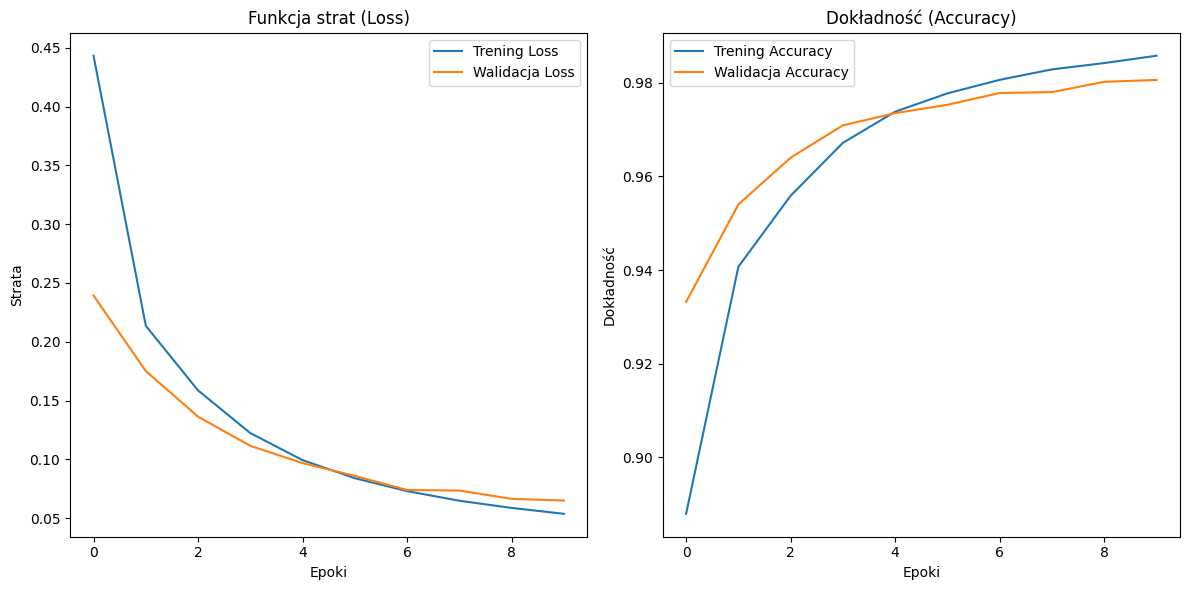

In [11]:
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import mnist # Wczytywanie danych MNIST
import numpy as np


#Funkcja load_data() z biblioteki Keras dla zbioru danych MNIST zwraca dwie krotki (tupla), które zawierają dane treningowe i testowe
#Po wywołaniu funkcji, mam cztery zmienne:
# * train_images: Zawiera 60,000 obrazów do trenowania modelu. To jest macierz 3D
# * train_labels: Zawiera etykiety (cyfry) odpowiadające tym obrazom treningowym.
# * test_images: Zawiera 10,000 obrazów do testowania modelu. To jest macierz 3D.
# * test_labels: Zawiera etykiety (cyfry) odpowiadające tym obrazom testowym.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Przygotowanie danych: normalizacja i dostosowanie wymiarów
#Dane train_images i test_images mają początkowy kształt (60000, 28, 28) i (10000, 28, 28), co oznacza, że są to obrazy w odcieniach szarości o wymiarach 28x28.
#Sieci konwolucyjne w Keras/TensorFlow oczekują wejść w formacie 4-wymiarowym: (liczba_obrazów, wysokość, szerokość, liczba_kanalow).
#Ostatni wymiar -1 oznacza liczbę kanałów (np. 1 dla obrazów w odcieniach szarości, 3 dla obrazów RGB).
#Po tej operacji:

#Kształt zmienia się na (60000, 28, 28, 1) dla zbioru treningowego oraz (10000, 28, 28, 1) dla zbioru testowego.
X_train = np.expand_dims(train_images, axis=-1) / 255.0  # Normalizacja 0-1
X_test = np.expand_dims(test_images, axis=-1) / 255.0  # Normalizacja 0-1

# Liczba klas
#Atrybut .shape tablicy NumPy zwraca kształt tablicy, czyli jej wymiary w formie krotki (dim1, dim2, ...)
class_cnt = np.unique(train_labels).shape[0]

# OKREŚLAMY WARTOŚCI PARAMETRÓW
#filter_cnt = 32 oznacza to, że warstwa konwolucyjna ma 32 różne filtry, a każdy z nich jest osobną macierzą o rozmiarze określonym przez kernel_size (np. (3, 3)).
# Jak to działa?

#     Każdy filtr jest unikalny:
#         Każdy z 32 filtrów uczy się innych cech obrazu, takich jak różne krawędzie, tekstury, wzory czy struktury.
#         Każdy filtr ma swoje własne wagi (parametry), które są aktualizowane podczas procesu uczenia.

#     Przesuwanie się filtra po obrazie:
#         Każdy z 32 filtrów przesuwa się po obrazie (operacja nazywana jest splotem lub konwolucją), stosując tę samą operację dla każdego regionu obrazu.
#         Wynikiem operacji jest mapa cech (feature map) – dwuwymiarowa tablica, która reprezentuje cechy wykryte przez dany filtr.

#     Liczba map cech (feature maps):
#         Jeśli mamy 32 filtry, otrzymujemy 32 mapy cech, czyli 32 różne reprezentacje obrazu przetworzone przez różne filtry.

#     Równoległość operacji:
#         Wszystkie filtry działają równolegle, więc każdy fragment obrazu jest analizowany przez wszystkie 32 filtry jednocześnie.
filter_cnt = 32
#********************************************************************************************************************************
#Współczynnik uczenia (learning rate).
# Znaczenie:
#     Określa, o ile zmieniane są wagi sieci podczas każdej iteracji optymalizacji.
#     Niska wartość, jak tutaj (0.0001), oznacza wolniejsze, ale bardziej precyzyjne zmiany wag, co pomaga w stabilnym treningu.
#     Zbyt duże wartości mogą prowadzić do niestabilności uczenia (skoki wokół optymalnego rozwiązania), a zbyt małe mogą sprawić, że model będzie się uczył bardzo wolno.
learning_rate = 0.0001
#******************************************************************************************************************************
# act_func jest to funkcja aktywacji dla neuronów w warstwach sieci.
# Znaczenie:

#     Funkcja aktywacji określa, jak dane przechodzą między warstwami sieci.
#     'relu' (Rectified Linear Unit) jest najczęściej używaną funkcją aktywacji w głębokich sieciach neuronowych
act_func = 'relu'
#***********************************
# Rozmiar jądra (filtra) w warstwie konwolucyjnej.
# Znaczenie:

#     Określa wysokość i szerokość każdego filtra.
#     W przypadku (3, 3) filtr jest macierzą o wymiarach 3x3.
#     Mniejsze jądra (np. 3x3) są popularne, ponieważ efektywnie wykrywają lokalne cechy obrazu, a ich stosowanie w kilku warstwach z rzędu pozwala na stopniowe analizowanie bardziej globalnych cech obrazu.
kernel_size = (3, 3)

# Tworzenie modelu
model = Sequential()

# Warstwa konwolucyjna
model.add(Conv2D(input_shape=X_train.shape[1:],
                 filters=filter_cnt,
                 kernel_size=kernel_size,
                 padding='same',
                 activation=act_func))

# Warstwa spłaszczająca
model.add(Flatten())

# Warstwa w pełni połączona (dense)
model.add(Dense(class_cnt, activation='softmax'))

# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Trenowanie modelu i zapisanie historii
# Tutaj ustawiamy liczbę epok.
history = model.fit(x=X_train, y=train_labels,
                    epochs=10,  # Ustawiłem 10 epok (można dostosować)
                    validation_data=(X_test, test_labels))

# Tworzenie wykresów

# Wykres funkcji strat (loss)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # jeden wiersz, dwie kolumny, praca na pierwszym polu licząc od lewej strony
plt.plot(history.history['loss'], label='Trening Loss')
plt.plot(history.history['val_loss'], label='Walidacja Loss')
plt.title('Funkcja strat (Loss)')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

# Wykres dokładności (accuracy)
plt.subplot(1, 2, 2) # jeden wiersz, dwie kolumny, praca na drugim polu licząc od lewej strony
plt.plot(history.history['accuracy'], label='Trening Accuracy')
plt.plot(history.history['val_accuracy'], label='Walidacja Accuracy')
plt.title('Dokładność (Accuracy)')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()

# Pokazanie wykresów
plt.tight_layout()
plt.show()

Opisać w jaki sposób interpretować wyniki i wykresy.

Kiedy na wykresie dokładności (accuracy) dla zbioru treningowego (history.history['accuracy']) oraz zbioru walidacyjnego (history.history['val_accuracy']) pojawiają się linie w formie łuków, które się przecinają, oznacza to, że model może doświadczać problemów z nadmiernym dopasowaniem (ang. overfitting). <br>
**Jak zinterpretować wykresy, gdy linie przecinają się:**

Wzrost dokładności na zbiorze treningowym:
Linia history.history['accuracy'] (dokładność na zbiorze treningowym) zazwyczaj rośnie w miarę postępu treningu. To jest normalne, ponieważ model dostosowuje się do danych treningowych, poprawiając swoje prognozy w trakcie nauki.

Zmniejszająca się dokładność na zbiorze walidacyjnym:
Linia history.history['val_accuracy'] (dokładność na zbiorze walidacyjnym) zazwyczaj rośnie na początku, ale po pewnym czasie może zacząć spadać, gdy model zaczyna się nadmiernie dopasowywać do danych treningowych.


Przecinające się linie mogą oznaczać, że model zaczyna "zapamiętywać" dane treningowe, zamiast ogólnego uogólnienia na nowe dane (co może prowadzić do pogorszenia wyników na danych walidacyjnych). W wyniku tego model może osiągać wyższą dokładność na danych treningowych, ale nie jest w stanie dobrze działać na nowych, nieznanych danych.


Wzrost i spadek dokładności na walidacji:
Jeśli dokładność na zbiorze walidacyjnym zaczyna spadać po osiągnięciu pewnego poziomu, podczas gdy dokładność na zbiorze treningowym rośnie, to oznacza, że model zaczął się **overfittingować.** Zbyt długo uczony model zaczyna "zapamiętywać" szczegóły treningu (szum i błędy) zamiast nauczyć się ogólnych zależności.
Wysoka dokładność na treningu i niska na walidacji to klasyczny objaw overfittingu.

Przykład analizy wykresu:

Pierwsze epoki:
Na początku obie linie (treningowa i walidacyjna) mogą rosnąć w podobnym tempie, co oznacza, że model uczy się dobrze zarówno na zbiorze treningowym, jak i walidacyjnym.
Późniejsze epoki:
Kiedy model staje się coraz bardziej dopasowany do danych treningowych, history.history['accuracy'] (dokładność na treningu) może rosnąć szybciej, ale history.history['val_accuracy'] (dokładność na walidacji) może zacząć spadać, co oznacza, że model zaczyna się przeuczać (overfitting).

Co zrobić, gdy występuje overfitting?

Zwiększyć dane treningowe: Więcej danych treningowych pomoże modelowi uczyć się bardziej ogólnych wzorców.
Regularizacja: Można dodać techniki regularizacji (np. L2 regularization, dropout) do modelu, aby ograniczyć jego zdolność do nadmiernego dopasowywania.
Early Stopping: Można zastosować early stopping, który zatrzyma trening, gdy dokładność na zbiorze walidacyjnym zacznie się pogarszać (zamiast kontynuować trening).
Zmiana architektury modelu: Może być konieczne zmniejszenie liczby warstw lub neuronów, aby uniknąć zbyt dużej złożoności modelu.<br>

**Co oznaczają liczby na pionowej osi na wykresie funkcji strat?**<br>
Wartości funkcji strat są liczone na podstawie różnicy między przewidywaniami modelu a rzeczywistymi wartościami.

**Co oznaczają liczby na pionowej osi na wykresie dopasowania?**<br>
Dokładność to odsetek poprawnych przewidywań modelu w stosunku do całkowitej liczby przykładów. Jest to liczba, która pokazuje, jak skutecznie model przewiduje odpowiedzi (np. klasy).
Wartości na osi pionowej to procentowy wynik dokładności, czyli stosunek liczby poprawnych odpowiedzi do ogólnej liczby próbek, wyrażony w postaci liczby między 0 a 1 (lub między 0% a 100% w zależności od skali).

Podsumowanie:

Przecinające się linie na wykresach accuracy i val_accuracy to często oznaka overfittingu, czyli nadmiernego dopasowania modelu do danych treningowych, które nie generalizuje dobrze na dane walidacyjne.
Jeśli dokładność na zbiorze treningowym rośnie, ale na walidacyjnym spada, warto rozważyć zastosowanie metod regularizacji lub użycie większej ilości danych, aby uniknąć nadmiernego dopasowania.


---



Możesz wyświetlić obrazy, na których model się pomylił (np. źle sklasyfikowane cyfry)

Co to są warstwy głosujące?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


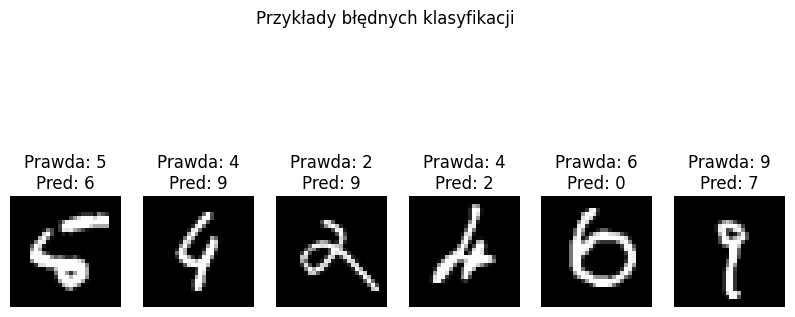

In [10]:
# Przewidywania na zbiorze testowym
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Wyszukanie błędnych klasyfikacji
incorrect = np.where(predicted_classes != test_labels)[0]

# Wyświetlenie kilku błędów
n_errors = 6
plt.figure(figsize=(10, 5))
for i in range(n_errors):
    plt.subplot(1, n_errors, i+1)
    plt.imshow(test_images[incorrect[i]], cmap='gray')
    plt.title(f"Prawda: {test_labels[incorrect[i]]}\nPred: {predicted_classes[incorrect[i]]}")
    plt.axis('off')
plt.suptitle("Przykłady błędnych klasyfikacji")
plt.show()

Zadanie dodatkowe:
Narysuj model tej sieci i zapisz go do pliku png.


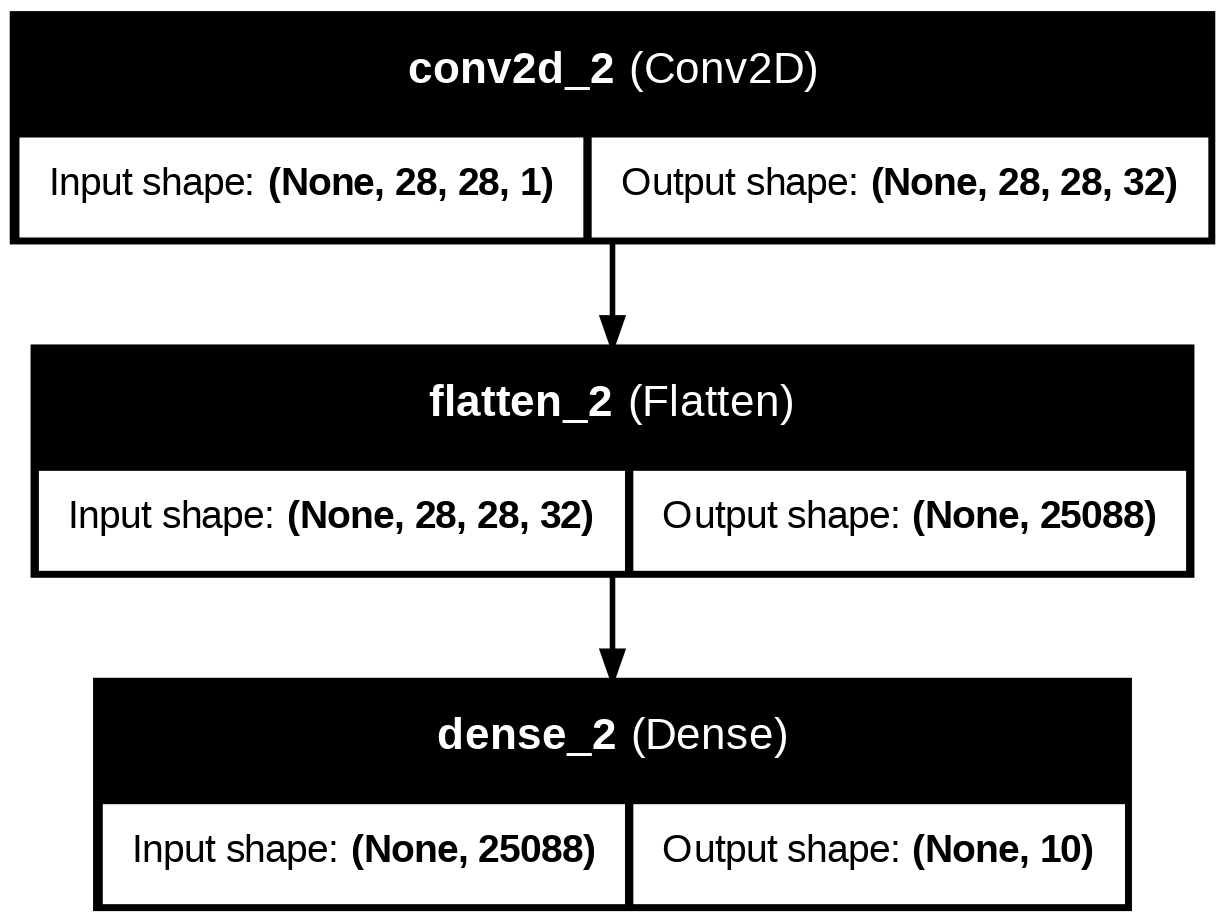

In [5]:
from keras.utils import plot_model

# Rysowanie modelu i zapisywanie do pliku
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Jeśli chcesz wyświetlić obraz w notebooku
from IPython.display import Image
Image('model_structure.png')

Napisz kod który wydrukuje tabelaryczne podsumowanie modelu, które zawiera:

  Nazwy warstw.
  Kształty wejść i wyjść.
  Liczbę parametrów do nauczenia.

In [6]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │         250,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 753,632 (2.87 MB)

 Trainable params: 251,210 (981.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 502,422 (1.92 MB)

Możesz podejrzeć, jak wyglądają filtry (wagi) nauczone przez warstwę konwolucyjną.

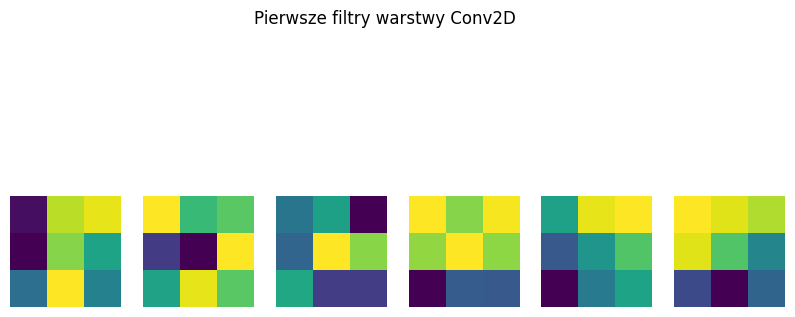

In [7]:
# Pobranie wag pierwszej warstwy (Conv2D)
filters, biases = model.layers[0].get_weights()

# Normalizacja wag dla wizualizacji
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Wizualizacja pierwszych 6 filtrów
n_filters = 6
plt.figure(figsize=(10, 5))
for i in range(n_filters):
    plt.subplot(1, n_filters, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')  # Kanał 0, filtr i
    plt.axis('off')
plt.suptitle("Pierwsze filtry warstwy Conv2D")
plt.show()

PRZYKŁAD: import danych cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


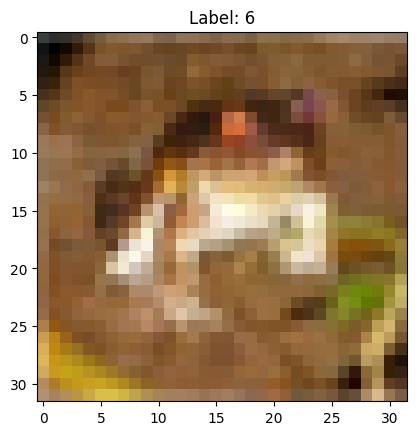

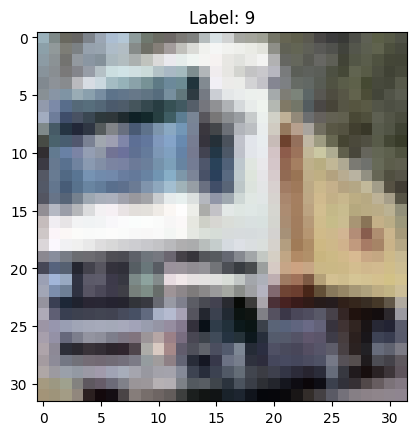

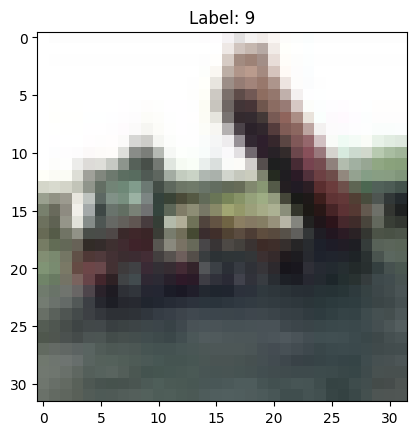

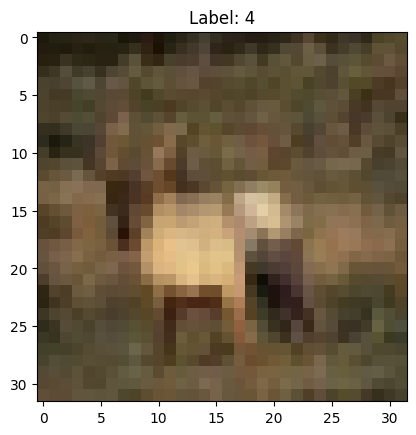

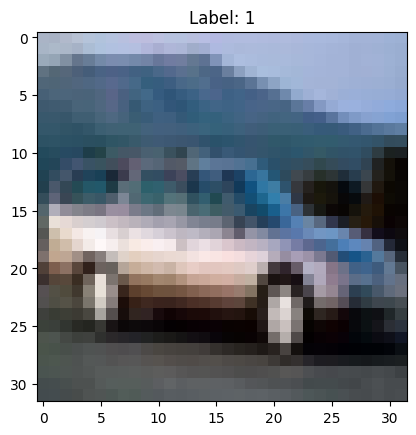

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Załaduj zbiór danych
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Wyświetlenie pierwszych kilku obrazów
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f'Label: {y_train[i][0]}')
    plt.show()